## Multivariate distribution 

##### Covariance and correlation

The covariance $Cov(X_1,X_2)$ is a measure of the joint variability of the two random variables $X_1$ and $X_2$. It gives us information about whether and how the two variables are correlated and it can be either positive or negative (hence, $Cov(X_1,X_2)	\lessgtr 0$). 

By definition 

$$ Cov(X_1,X_2)=\mathop{{}\mathbb{E}}([X_1-\mathop{{}\mathbb{E}}(X_1)][X_2-\mathop{{}\mathbb{E}}(X_2)]) $$ 

where $\mathop{{}\mathbb{E}}(X_1)$ is the expected value of the first random variable, for instance. 

Remember: the expected value of a random variable X is 

$$ \mathop{{}\mathbb{E}}(X)=\sum_{i=1}^{\infty} x_i p_i $$ 

where $x_i$ represents a possible outcome of X and $p_i$ is the associated probability.

If $Cov(X_1,X_2)>0$ it means that high (low) values of $X_1$ occur together with high (low) values of $X_2$, therefore the covariance is defined as *POSITIVE*.

![image](./positive_cov.png)

On the other hand, if $Cov(X_1,X_2)<0$ it means that high (low) values of $X_1$ occur together with low (high) values of $X_2$. In this case the covariance is defined as *NEGATIVE*.

![image](./negative_cov.png)

Let's start by importing the required libraries and loading the data we use for the explanation.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
import datetime
from statistics import mean
from statistics import stdev
import ipywidgets as widgets

%matplotlib inline

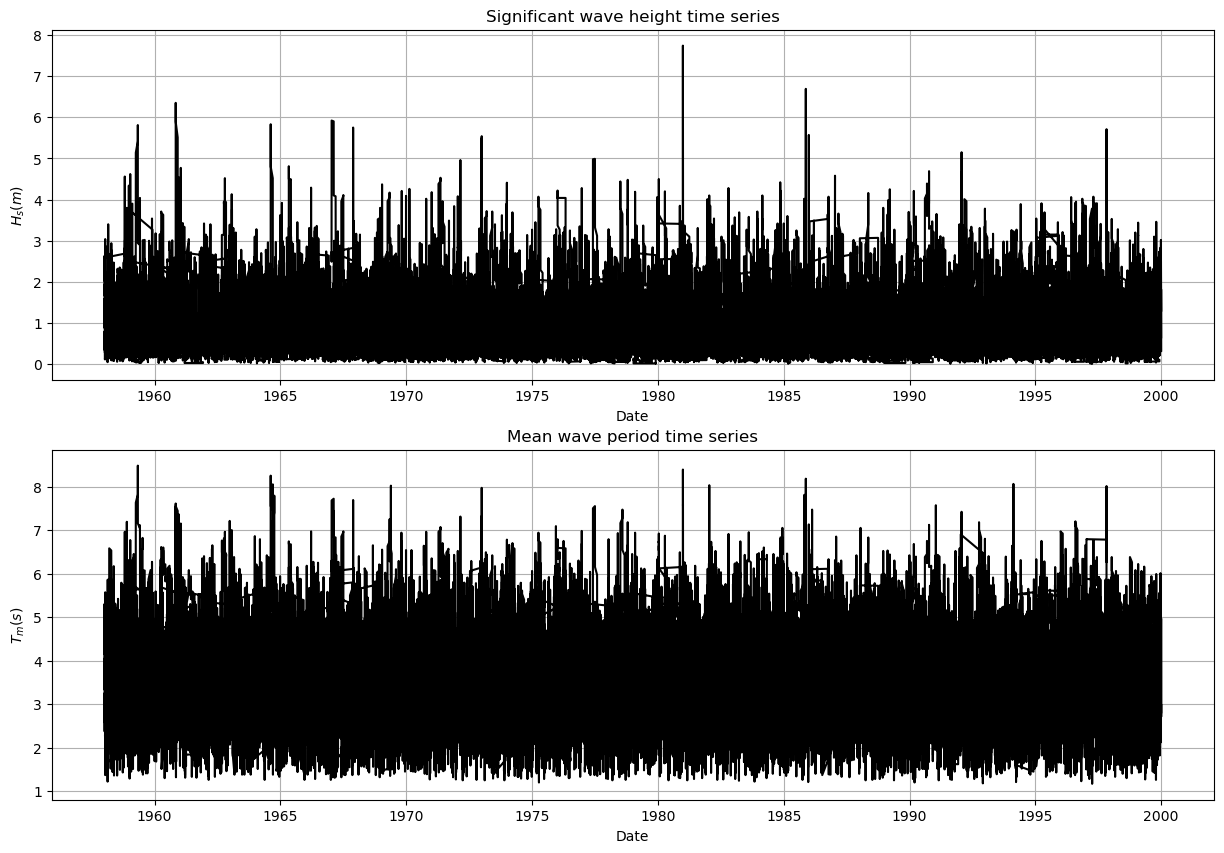

In [4]:
data = pd.read_csv('SIMAR_node.csv', sep = ',', dtype={'Date (GMT)':'str', 'Hs(m)': 'float', 'Tm(s)': 'float'})
data['Date (GMT)'] = pd.to_datetime(data['Date (GMT)'])

data.set_axis([np.linspace(0, len(data)-1, len(data), dtype=int)], axis = 'index', inplace=True)
fig, axs = plt.subplots(2, 1)
axs[0].plot(data['Date (GMT)'], data['Hs(m)'], 'k', label = '${H_s(m)}$')
axs[0].set_title('Significant wave height time series')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('${H_s (m)}$')
axs[0].grid()
axs[1].plot(data['Date (GMT)'], data['Tm(s)'], 'k', label = '${T_m(s)}$')

axs[1].set_title('Mean wave period time series')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('${T_m (s)}$')
axs[1].grid()
fig.set_size_inches(15, 10)

We start creating a function to calculate the covariance of two random variables. 

In [5]:
def calculate_covariance(X1, X2):
    '''
    Calculate the covariance of two random variables X1 and X2
    '''
    mean_x1 = mean(X1)
    mean_x2 = mean(X2)
    diff_x1 = [item-mean_x1 for item in X1]
    diff_x2 = [item-mean_x2 for item in X2]
    product = [a*b for a,b in zip(diff_x1,diff_x2)]
    covariance = mean(product)
    return covariance

Now we are ready for actually computing the covariance of our data.

In [6]:
covariance = calculate_covariance(data['Hs(m)'], data['Tm(s)'])
print(f'The covariance of Hs and Tm is {covariance:.5f}')

The covariance of Hs and Tm is 0.45179


Not a high value but positive: it means that as the significant wave height $H_s$ increases, the period $T_m$ generally increases as well ($Cov>0$ = positive correlation between the two random variables). 

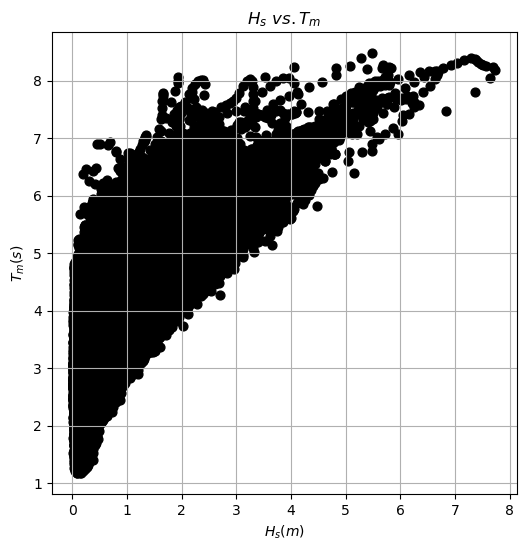

In [7]:
fig, axs = plt.subplots(1, 1)
axs.scatter(data['Hs(m)'], data['Tm(s)'], 40, 'k')
axs.set_title('${H_s \\ vs. T_m}$')
axs.set_ylabel('${T_m (s)}$')
axs.set_xlabel('${H_s (m)}$')
fig.set_size_inches(6, 6)
axs.grid()

In order to better understand the relation between the two random variables we can also compute the Pearson coefficient, or correlation coefficient, 

$$ \rho(X_1,X_2)=\frac{Cov(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}} $$ 

which in fact is a measure of the strength of the linear relationship among the variables.

Since both $\sigma_{X_1}$ and $\sigma_{X_2}$ are in variable units, then $-1<\rho(X_1,X_2)<1$.

There are three main cases:
- $\rho(X_1,X_2)=-1$, perfect linear negative dependence;

![image](./neg_dependence.png)

- $\rho(X_1,X_2)=0$, independence;

![image](./independence.png)

- $\rho(X_1,X_2)=1$, perfect linear positive dependence.

![image](./pos_dependence.png)

Generally it is quite difficult to find cases in which $\rho=\pm 1$ or even $\rho=0$. In fact it is more likely to have values of $\rho$ that range between $-1$ and $1$ and, based on this value, we can determine the strength of the linear dependence.

Again we define a function to compute the Pearson coefficient.

In [8]:
def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(stdev(X1)*stdev(X2))
    return correl_coeff

Now we are ready to apply it to our data.

In [9]:
correl_coeff = pearson_correlation(data['Hs(m)'], data['Tm(s)'])
print(f'The correlation coefficient of Hs and Tm is {correl_coeff:.5f}')

The correlation coefficient of Hs and Tm is 0.74126


As said before, a coefficient $\rho>0$ means that there is a positive linear correlation among the two variables and the value that comes from the previous computation shows that this correlation is quite strong as well.

##### Bivariate Gaussian Density and Cumulative Distribution

Given a multidimensional random Gaussian vector $X=(X_1,X_2)$, where $X_1$ and $X_2$ are two correlated continuous random variables, we can define the Probability Density Function (PDF) of its Bivariate Normal Distribution as 

$$ \phi_{\rho} (x_1, x_2) = \frac {1}{2 \pi \sigma_{1} \sigma_{2} \sqrt{1-\rho^2}} e^{- \frac {(\frac {x_1-\mu_{1}}{\sigma_{1}})^2 - (\frac {2 \rho (x_1 - \mu_{1})(x_2 - \mu_{2})}{\sigma_{1} \sigma_{2}}) + (\frac {x_2-\mu_{2}}{\sigma_{2}})^2}{2(1-\rho^2)}} $$

which requires the five parameters $\mu_{1}$, $\mu_{2}$, $\sigma_{1}$, $\sigma_{2}$, and $\rho$. 

The PDF in general form can be rewritten as 

$$ \phi_{\rho} (x_1, x_2) = \frac {1}{\sqrt{(2 \pi)^2 |\Sigma|}} e^{(- \frac{1}{2} (\bf x - \bf \mu)^{T} \Sigma ^{-1} (\bf x - \bf \mu))} $$

where $\Sigma=\begin{bmatrix}
   \sigma_1^2 & Cov(X_1,X_2)\\
   Cov(X_1,X_2) & \sigma_2^2 
\end{bmatrix}$ is the Covariance matrix.

We start computing the parameters (mean $\mu$ and standard deviation $\sigma$) of our data.

In [10]:
mu1 = mean(data['Hs(m)']) #mu_1
mu2 = mean(data['Tm(s)']) #mu_2
s1 = stdev(data['Hs(m)'])  #sigma_x1
s2 = stdev(data['Tm(s)'])  #sigma_x2
rho = correl_coeff #correlation coefficient

Then we define the vector of the means $\bf \mu$ and the covariance matrix $\Sigma$.

In [11]:
mu = [mu1, mu2] #vector of means
sigma = np.array([[s1**2 , covariance], [covariance, s2**2]]) #Sigma
print(f'\u03BC = {mu}')
print(f'\u03A3 = { sigma}')

μ = [0.8741895144639326, 3.5363356588641848]
Σ = [[0.42290357 0.45178703]
 [0.45178703 0.87838703]]


The following code is default code required for the analysis and computation of the PDF. We create two vectors for evaluating both $H_s$ and $T_m$.

In [12]:
n = 40 #size of the mesh
eval_Hs = np.linspace(mu[0]-1.5*s1,mu[0]+3.8*s1,n)
eval_Tm = np.linspace(mu[1]-3.8*s1,mu[1]+3.8*s2,n)

X1,X2 = np.meshgrid(eval_Hs,eval_Tm)
X = np.array([np.concatenate(X1.T), np.concatenate(X2.T)]).T

Now we fit the normal distribution.

In [13]:
Z = multivariate_normal(mean=mu, cov=sigma).pdf(X)

And then we can plot it.

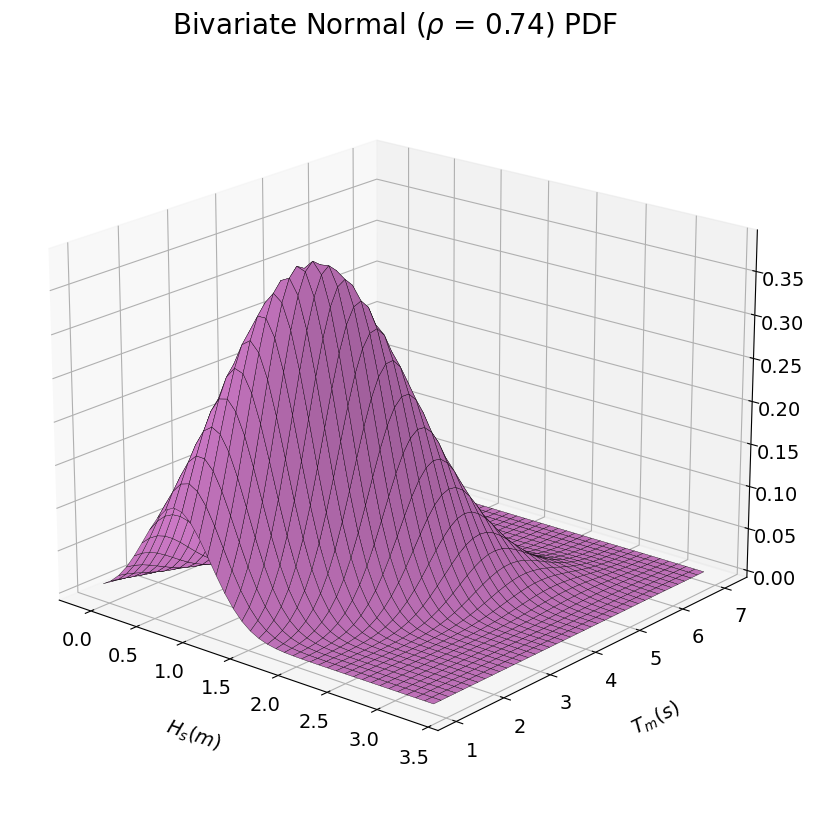

In [14]:
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z.reshape(X1.shape), color='#F792EF', edgecolor='black', linewidth=.25)
ax.set_xlabel('$H_s(m)$',labelpad=20)
ax.set_ylabel('$T_m(s)$',labelpad=20)
ax.set_zlabel('$f(x_1,x_2)$',labelpad=20)
ax.set_title(f'Bivariate Normal ($\\rho$ = {round(rho, 2)}) PDF', fontsize=20)
ax.view_init(ax.elev-10, ax.azim+10)
plt.show()

We can also determine the Cumulative Distribution Function (CDF) of the same multidimensional Gaussian vector, which is

$$ P(X_1<x_1, X_2<x_2)= \int\limits_{-\infty}^{x_1} \int\limits_{-\infty}^{x_2} \phi_{\rho}(s_1, s_2) ds_1 ds_2 $$

given $\phi_{\rho}(s_1, s_2)$ the PDF of the same vector.

In [15]:
p = multivariate_normal(mean=mu, cov=sigma).cdf(X)

And now we plot the result.

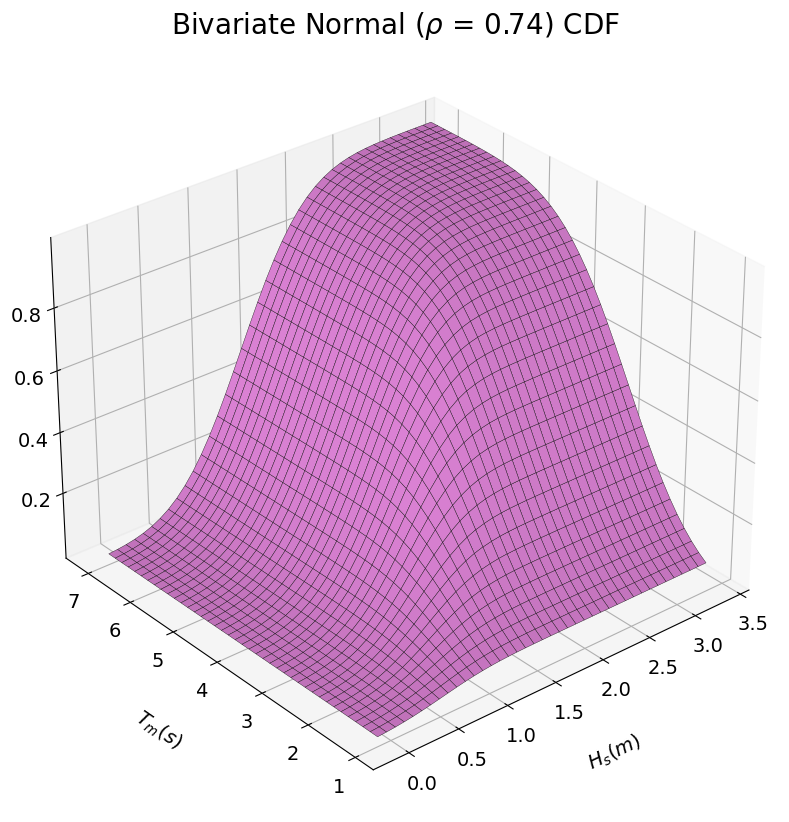

In [16]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, p.reshape(X1.shape), color='#F792EF', edgecolor='black', linewidth=.25)
ax.set_xlabel('$H_s(m)$',labelpad=20)
ax.set_ylabel('$T_m(s)$',labelpad=20)
ax.set_zlabel('$P(X_1 \leq x_1, X_2 \leq x_2)$',labelpad=20)
ax.set_title(f'Bivariate Normal ($\\rho$ = {round(rho, 2)}) CDF', fontsize=20)
ax.view_init(ax.elev, ax.azim-70)
plt.show()

##### Conditional Distribution

A Conditional Distribution is just a Bivariate Gaussian Distribution with a particular mean $\bf \mu$ and covariance matrix $\Sigma$, that is due to the fact that we already know the value of one of the two random variables.

$(x_1|x_2=a) \sim N (\overline \mu, \overline \Sigma)$ 

In this way both the conditional mean

$$ \overline \mu = \mu_1 + \Sigma_{12} \Sigma_{22}^{-1}(a-\mu_2) $$  

and the conditional covariance matrix

$$ \overline \Sigma = \Sigma_{11}-\Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21} $$

will be scalars (in case of a two dimensional vector).

Obviously, when we deal with a conditional distribution we have to understand that its behaviour will be different from the originial one because we have conitionalized it, that is we have imposed the value of one of the two random variables and therefore the other variable will depend on it. 

We can create a function for computing the conditional distribution of the wave height $H_s$ given the value of the period $T_m$. 

In [17]:
def ConditionalNormal(M, S, idxC, valC):
    """
    CondionalNormal calculates the parameters of the conditional 
    normal distribution
    
    Parameters
    ----------
    M : numpy.ndarray
        Mean vector of the multivariate normal
    S : numpy.ndarray
        Covariance matrix of the multivariate normal
    idxC : list
        Index/Indices of the conditioning nodes
    valC : numpy.ndarray
        Values of the conditioning nodes
        
    Returns
    -------
    Mc : numpy.ndarray
        Mean vector of the conditional multivariate normal on valC
    Sc : numpy.ndarray
        Covariance matrix of the conditional multivariate normal valC
    """
    if not isinstance(M,np.ndarray):
        M = np.array(M)
    D = len(M)  # Dimension of the multivariate normal
    idxNC = list(list(set(range(D)) - set(idxC)))
    # Calculation of the conditional normal distribution:
    M1 = M[idxNC]
    S11 = S[np.ix_(idxNC, idxNC)]
    X2 = valC
    M2 = M[idxC]
    S22 = S[np.ix_(idxC, idxC)]
    S12 = S[np.ix_(idxNC, idxC)]
    S21 = S[np.ix_(idxC, idxNC)]
    S22_inv = np.linalg.inv(S22)

    Sc = S11 - S12 @ S22_inv @ S21
    Mc = M1 + S12 @ S22_inv @ (X2 - M2)
    return Mc, Sc

We set the index of the conditioning variable and its value and finally we compute the conditional distribution.

In [18]:
idxC = [1] 
valC = 6 

[Mc, Sc] = ConditionalNormal(mu, sigma, idxC ,valC)

Now we can compute the marginal and conditional distribution of the first variable and then plot it.

In [19]:
po = norm.cdf(eval_Hs,mu[0],s1)
poc = norm.cdf(eval_Hs,Mc,Sc**0.5).reshape(po.shape)

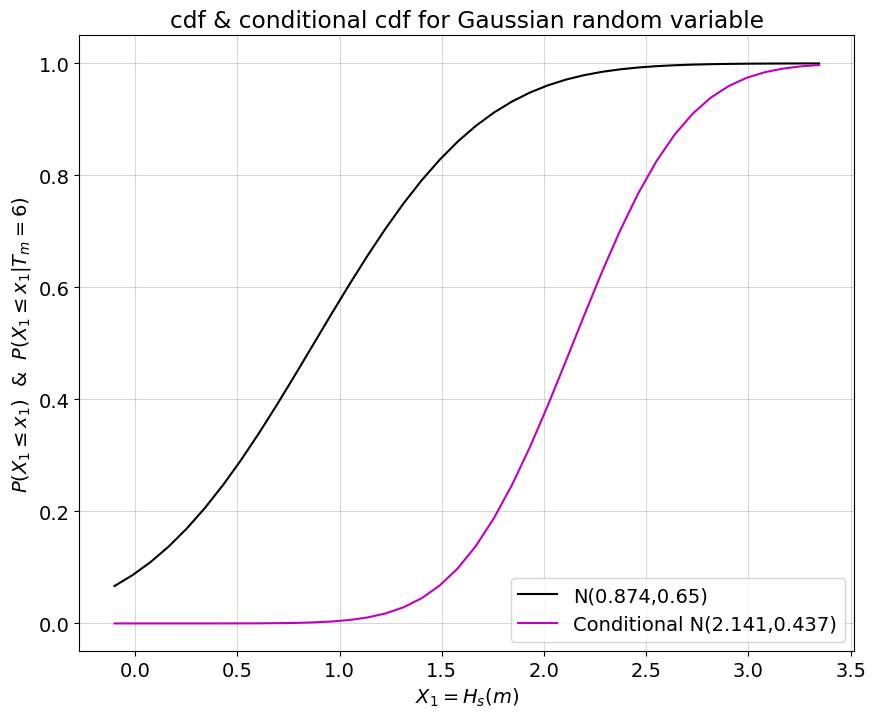

In [20]:
plt.figure(figsize=(10,8))
plt.plot(eval_Hs,po,'k', label = f'N({np.round(mu[0], 3)},{np.round(s1, 3)})' )
plt.plot(eval_Hs,poc,'m', label = f'Conditional N({np.round(Mc[0],3)},{np.round(Sc[0][0]**.5,3)})')
plt.ylabel(f'$P(X_1 \leq x_1)$  &  $P(X_1 \leq x_1|T_m = {valC})$')
plt.xlabel(f'$X_1 = H_s(m)$')
plt.title('cdf & conditional cdf for Gaussian random variable')
plt.grid('--', color='gray', alpha=.3)
plt.legend(loc='lower right')
plt.show()

As said before, the conditional distribution (pink line) will be different from the original one.
\
Specifically for this case, since there is a positive correlation between the variables ($\rho=0.74$) and we are conditionalizing the first variable based on a value of the second variable higher than its mean, then the mean of the conditional distribution will be higher than the mean of the original one. 

The same applies for vectors with higher dimensions. However, in this case the resulting conditional mean and conditional covariance matrix won't be scalars but a vector and a matrix, respectively.

We repeat the procedure by defining the parameters ($\mu$, $\sigma$ and $\rho$) and again setting the conditioning variable and its value.

In [23]:
mu3 = [-3, 5, 4]
sigma1 = 5  
sigma2 = 4  
sigma3 = 6
rho = -0.77 
rho13 = 0.4
rho23 = 0.2
idxC = [2] 
valC = 6 

Then we define the mean and covariance matrix and compute the parameters of the conditional distribution.

In [24]:
cov = sigma1*sigma2*rho  
cov13 = sigma1*sigma3*rho13
cov23 = sigma2*sigma3*rho23

sigma = np.array([[sigma1**2 , cov], [cov, sigma2**2]])
SS = np.array([[sigma1**2, cov, cov13], [cov, sigma2**2, cov23], [cov13, cov23, sigma3**2]])

[Mc, Sc] = ConditionalNormal(mu3, SS, idxC ,valC)
rhoc = Sc[0,1]/(Sc[0,0]**0.5*Sc[1,1]**0.5)

Now we can compute the density of the conditional distribution.

In [25]:
x11 = np.linspace(Mc[0]-3.8*Sc[0,0]**0.5,Mc[0]+3.8*Sc[0,0]**0.5,n)
x22 = np.linspace(Mc[1]-3.8*Sc[1,1]**0.5,Mc[1]+3.8*Sc[1,1]**0.5,n)

[X1c,X2c] = np.meshgrid(x11,x22)

Xc = np.array([np.concatenate(X1c.T), np.concatenate(X2c.T)]).T
Zc = multivariate_normal(mean=Mc, cov=Sc).pdf(Xc)

And finally plot it and compare it.

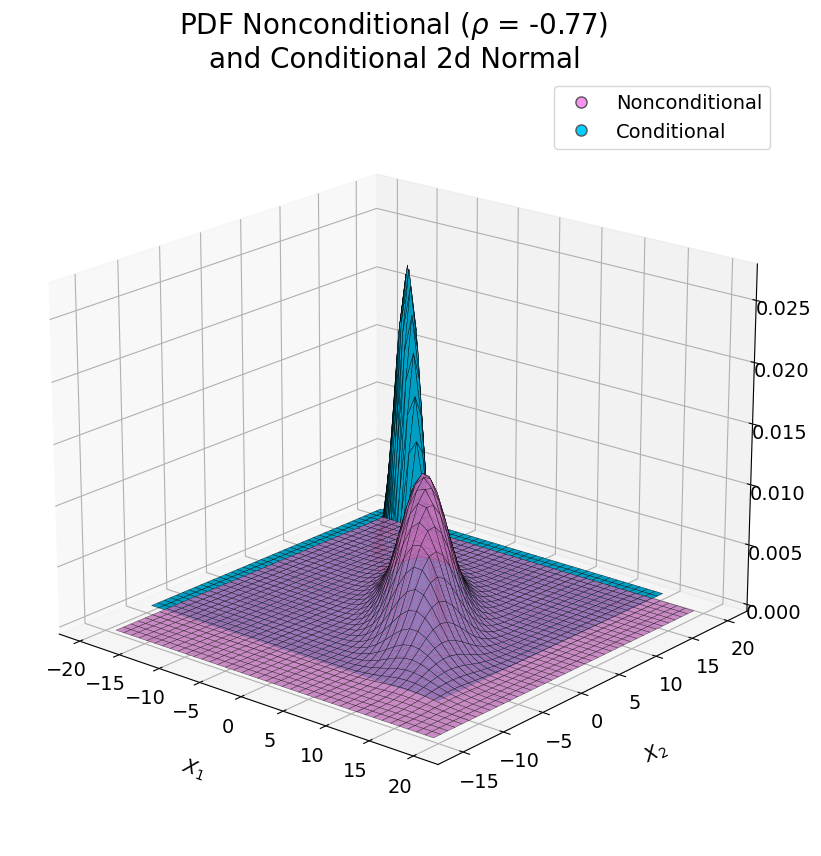

In [28]:
x1 = np.linspace(mu[0]-3.8*sigma1,mu[0]+3.8*sigma1,n)
x2 = np.linspace(mu[1]-3.8*sigma1,mu[1]+3.8*sigma2,n)

X1,X2 = np.meshgrid(x1,x2)
X = np.array([np.concatenate(X1.T), np.concatenate(X2.T)]).T
Z = multivariate_normal(mean=mu, cov=sigma).pdf(X)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z.reshape(X1.shape), alpha = .8,color = '#F792EF', edgecolor='black', linewidth=.25, label='nonconditional')
ax.plot_surface(X1c, X2c, Zc.reshape(X1c.shape), color = '#00CEFF',  edgecolor='black', linewidth=.25, label='conditional')
ax.set_xlabel('$X_1$',labelpad=20)
ax.set_ylabel('$X_2$',labelpad=20)
ax.set_zlabel('$\phi(x_1,x_2)$',labelpad=20)
ax.set_title(f'PDF Nonconditional ($\\rho$ = {np.round(rho, 3)}) \n' f'and Conditional 2d Normal', fontsize=20)
colors = ['#F792EF','#00CEFF']
texts = ['Nonconditional', 'Conditional']
legend_box = [plt.plot([],[], marker="o", ms=8,ls="", mec='#555555', color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts))]
ax.legend(handles=legend_box, numpoints = 1)
ax.view_init(ax.elev-10, ax.azim+10)
plt.show()

Again, we can see that the conditional distribution reaches higher values than the nonconditional one. 